##  Feature Detection Using Deep Belief Networks(DBN)

Load the necessary libraries.

In [32]:
import tensorflow as tf
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
%matplotlib inline

Load the MNIST dataset.

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
train_X, train_Y, validation_X, validation_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.validation.images, mnist.validation.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Print shape of dataset.

In [3]:
print("Shape of train_X: ", train_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of validation_X: ", validation_X.shape)
print("Shape of validation_Y: ", validation_Y.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (55000, 784)
Shape of train_Y:  (55000,)
Shape of validation_X:  (5000, 784)
Shape of validation_Y:  (5000,)
Shape of test_X:  (10000, 784)
Shape of test_Y:  (10000,)


Store MNIST dataset in Pandas DataFrames.

In [4]:
train_index = range(0,len(train_X))
validation_index = range(len(train_X), len(train_X)+len(validation_X))
test_index = range(len(train_X)+len(validation_X), len(train_X)+len(validation_X)+len(test_X))

train_X = pd.DataFrame(data=train_X,index=train_index)
train_Y = pd.Series(data=train_Y,index=train_index)

validation_X = pd.DataFrame(data=validation_X,index=validation_index)
validation_Y = pd.Series(data=validation_Y,index=validation_index)

test_X = pd.DataFrame(data=test_X,index=test_index)
test_Y = pd.Series(data=test_Y,index=test_index)

Describe the training matrix.

In [5]:
train_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.0,55000.0,55000.0,55000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000775,0.000330,0.000173,0.000063,0.000052,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023550,0.015158,0.011063,0.006061,0.006492,0.001420,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


Show the labels.

In [6]:
train_Y.head()

0    7
1    3
2    4
3    6
4    1
dtype: uint8

In [7]:
def view_digit(X, y, example):
    label = y.loc[example]
    image = X.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

View the first digit.

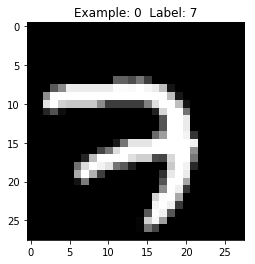

In [8]:
view_digit(train_X, train_Y, 0)

Encode the labels as one-hot vectors.

In [9]:
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

Create one-hot vectors for the labels.

In [10]:
from sklearn import preprocessing as pp
y_train_oneHot = one_hot(train_Y)
y_validation_oneHot = one_hot(validation_Y)
y_test_oneHot = one_hot(test_Y)

Show one-hot vector for example 0, which is the number 7.

In [11]:
y_train_oneHot[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Next, let’s define an RBM class so we can train several RBMs (which are the building blocks for DBNs) in quick succession.

RBMs have an input layer (visible layer) and a single hidden layer, and the connections among neurons are restricted such that neurons are connected only to the neurons in other layers but not to neurons within the same layer. Communication between layers happens in both directions, not just in one direction or a feedforward way, as in the case of autoencoders.

In an RBM, the neurons in the visible layer communicate with the hidden layer, the hidden layer generates data from the probabilistic model the RBM has learned, and then the hidden layer passes this generated information back to the visible layer. The visible layer takes the generated data from the hidden layer, samples it, compares it to the original data, and, based on the reconstruction error between the generated data sample and the original data, sends new information to the hidden layer to repeat the process once again.

By communicating in this bidirectional way, the RBM develops a generative model such that the reconstructions from the output of the hidden layer are similar to the original input.

In [12]:
# Define RBM class
class RBM(object):
    
    def __init__(self, input_size, output_size, 
                 learning_rate, epochs, batchsize):
        # Define hyperparameters
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        
        # Initialize weights and biases using zero matrices
        self.w = np.zeros([input_size, output_size], dtype=np.float32)
        self.hb = np.zeros([output_size], dtype=np.float32)
        self.vb = np.zeros([input_size], dtype=np.float32)
    # forward pass, where h is the hidden layer and v is the visible layer
    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)
    # backward pass
    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    # sampling function
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random_uniform(tf.shape(probs))))

    def train(self, X):
        _w = tf.placeholder(tf.float32, [self._input_size, self._output_size])
        _hb = tf.placeholder(tf.float32, [self._output_size])
        _vb = tf.placeholder(tf.float32, [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        prv_hb = np.zeros([self._output_size], dtype=np.float32)
        prv_vb = np.zeros([self._input_size], dtype=np.float32)
        
        cur_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        cur_hb = np.zeros([self._output_size], dtype=np.float32)
        cur_vb = np.zeros([self._input_size], dtype=np.float32)
        
        v0 = tf.placeholder(tf.float32, [None, self._input_size])
        h0 = self.sample_prob(self.prob_h_given_v(v0, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        #To update the weights, we perform constrastive divergence.
        positive_grad = tf.matmul(tf.transpose(v0), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        update_w = _w + self.learning_rate * (positive_grad - negative_grad) / tf.to_float(tf.shape(v0)[0])
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(v0 - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        # We also define the error as the MSE
        err = tf.reduce_mean(tf.square(v0 - v1))
        
        error_list = []
        '''Once we call sess.run, we can feed in batches of data to begin the training. 
           During the training, forward and backward passes will be made, and the RBM 
           will update weights based on how the generated data compares to the original input. 
           We will print the reconstruction error from each epoch'''
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            for epoch in range(self.epochs):
                for start, end in zip(range(0, len(X),  self.batchsize),range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch,  _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print ('Epoch: %d' % epoch,'reconstruction error: %f' % error)
                error_list.append(error)
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb
            return error_list
    #function to generate new images from the generative model that the RBM has learned
    def rbm_output(self, X):
        
        input_X = tf.constant(X)
        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)
        out = tf.nn.sigmoid(tf.matmul(input_X, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(input_X, _w, _hb))
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            return sess.run(out), sess.run(visibleGen), sess.run(hiddenGen)
    # function to show the feature detectors of the hidden layer    
    def show_features(self, shape, suptitle, count=-1):
        maxw = np.amax(self.w.T)
        minw = np.amin(self.w.T)
        count = self._output_size if count == -1 or count > self._output_size else count
        ncols = count if count < 14 else 14 
        nrows = count//ncols
        nrows = nrows if nrows > 2 else 3
        fig = plt.figure(figsize=(ncols, nrows), dpi=100)
        grid = Grid(fig, rect=111, nrows_ncols=(nrows, ncols), axes_pad=0.01)

        for i, ax in enumerate(grid):
            x = self.w.T[i] if i<self._input_size else np.zeros(shape)
            x = (x.reshape(1, -1) - minw)/maxw
            ax.imshow(x.reshape(*shape), cmap=mpl.cm.Greys)
            ax.set_axis_off()

        fig.text(0.5,1, suptitle, fontsize=20, horizontalalignment='center')
        fig.tight_layout()
        plt.show()
        return

Since we are training, set input as training data.

In [13]:
inputX = np.array(train_X)
inputX = inputX.astype(np.float32)

# Create list to hold our RBMs
rbm_list = []

# Define the parameters of the RBMs we will train
rbm_list.append(RBM(784,700,1.0,100,200))
rbm_list.append(RBM(700,600,1.0,100,200))
rbm_list.append(RBM(600,500,1.0,100,200))

In [14]:
outputList = []
error_list = []
#For each RBM in our list
for i in range(0,len(rbm_list)):
    print('RBM', i+1)
    #Train a new one
    rbm = rbm_list[i]
    err = rbm.train(inputX)
    error_list.append(err)
    #Return the output layer
    outputX, reconstructedX, hiddenX = rbm.rbm_output(inputX)
    outputList.append(outputX)
    inputX = hiddenX

RBM 1
Epoch: 0 reconstruction error: 0.072295
Epoch: 1 reconstruction error: 0.061851
Epoch: 2 reconstruction error: 0.055352
Epoch: 3 reconstruction error: 0.052211
Epoch: 4 reconstruction error: 0.049465
Epoch: 5 reconstruction error: 0.048158
Epoch: 6 reconstruction error: 0.046893
Epoch: 7 reconstruction error: 0.045549
Epoch: 8 reconstruction error: 0.044562
Epoch: 9 reconstruction error: 0.043560
Epoch: 10 reconstruction error: 0.043181
Epoch: 11 reconstruction error: 0.042783
Epoch: 12 reconstruction error: 0.042066
Epoch: 13 reconstruction error: 0.041836
Epoch: 14 reconstruction error: 0.041535
Epoch: 15 reconstruction error: 0.041668
Epoch: 16 reconstruction error: 0.041060
Epoch: 17 reconstruction error: 0.040912
Epoch: 18 reconstruction error: 0.041107
Epoch: 19 reconstruction error: 0.040690
Epoch: 20 reconstruction error: 0.040227
Epoch: 21 reconstruction error: 0.040252
Epoch: 22 reconstruction error: 0.039972
Epoch: 23 reconstruction error: 0.039995
Epoch: 24 reconstruc

Epoch: 0 reconstruction error: 0.031152
Epoch: 1 reconstruction error: 0.026337
Epoch: 2 reconstruction error: 0.024025
Epoch: 3 reconstruction error: 0.022709
Epoch: 4 reconstruction error: 0.021504
Epoch: 5 reconstruction error: 0.020841
Epoch: 6 reconstruction error: 0.020349
Epoch: 7 reconstruction error: 0.019756
Epoch: 8 reconstruction error: 0.019344
Epoch: 9 reconstruction error: 0.019030
Epoch: 10 reconstruction error: 0.018781
Epoch: 11 reconstruction error: 0.018384
Epoch: 12 reconstruction error: 0.018314
Epoch: 13 reconstruction error: 0.018140
Epoch: 14 reconstruction error: 0.017901
Epoch: 15 reconstruction error: 0.017819
Epoch: 16 reconstruction error: 0.017500
Epoch: 17 reconstruction error: 0.017166
Epoch: 18 reconstruction error: 0.017078
Epoch: 19 reconstruction error: 0.017095
Epoch: 20 reconstruction error: 0.016881
Epoch: 21 reconstruction error: 0.016817
Epoch: 22 reconstruction error: 0.016811
Epoch: 23 reconstruction error: 0.016680
Epoch: 24 reconstruction e

Plot reconstruction errors.

RBM 1


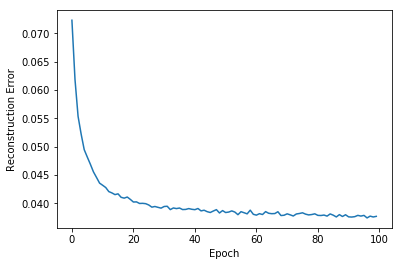

RBM 2


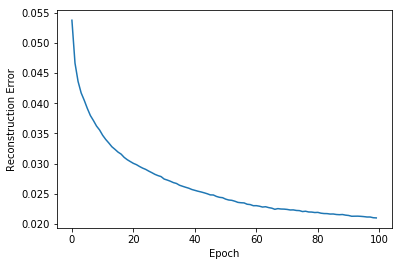

RBM 3


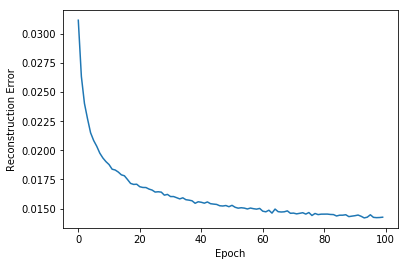

In [15]:
i = 1
for err in error_list:
    print("RBM",i)
    pd.Series(err).plot(logy=False)
    plt.xlabel("Epoch")
    plt.ylabel("Reconstruction Error")
    plt.show()
    i += 1

Examine Feature Detectors.

RBM 0


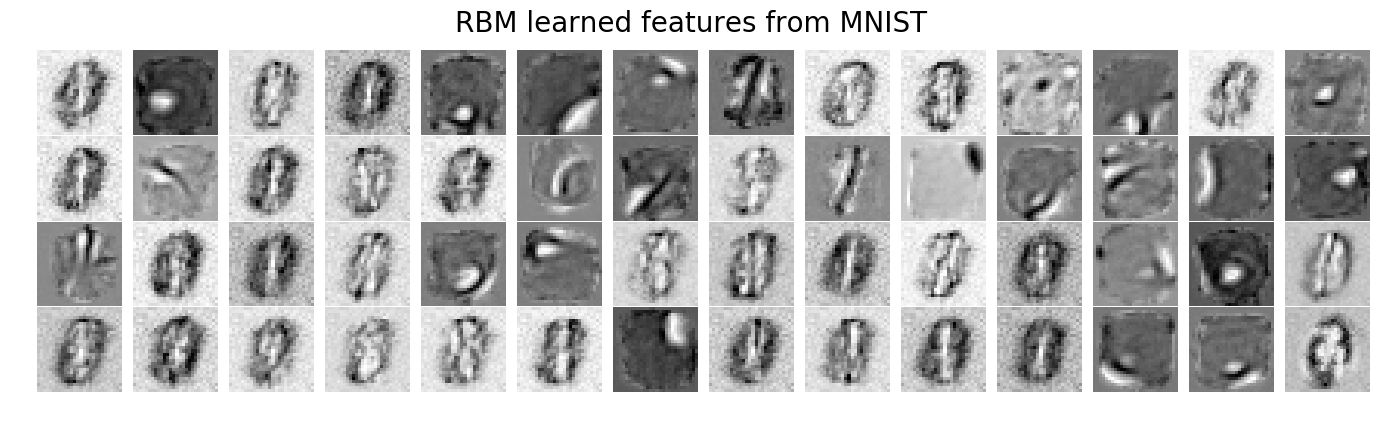

None
RBM 1


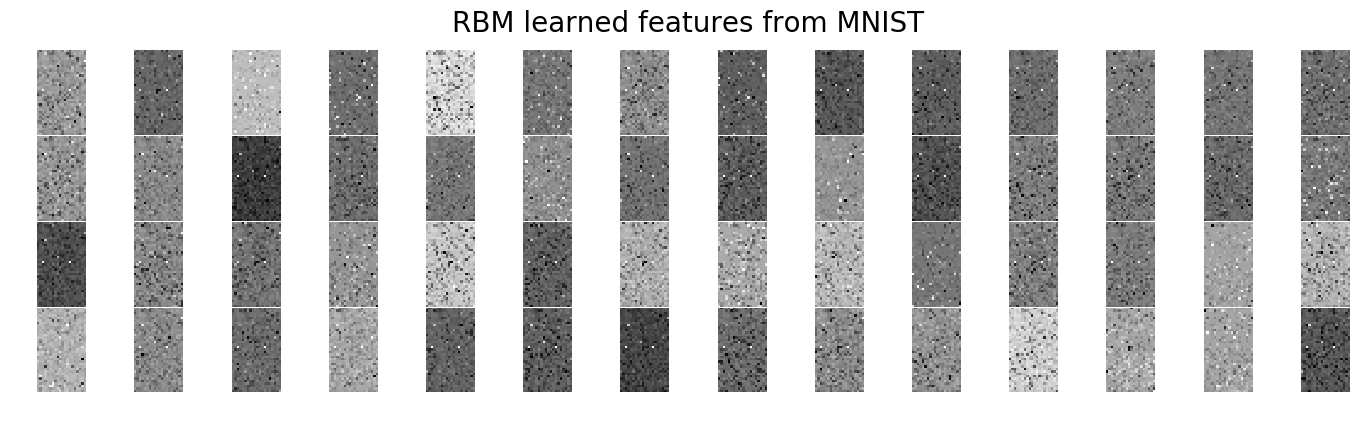

None
RBM 2


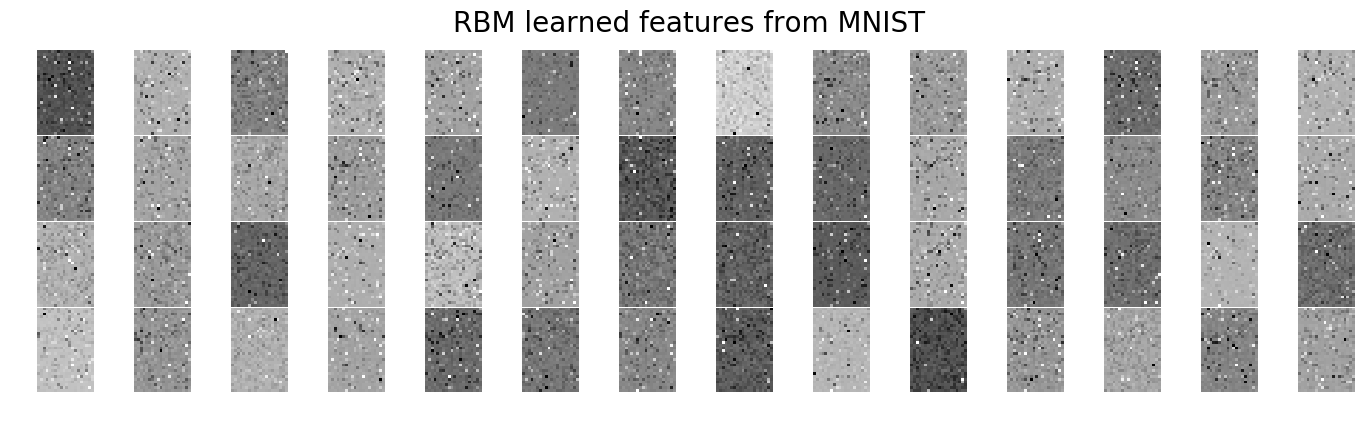

None


In [16]:
rbm_shapes = [(28,28),(35,20),(30,20)]
for i in range(0,len(rbm_list)):
    rbm = rbm_list[i]
    print("RBM",i)
    print(rbm.show_features(rbm_shapes[i], "RBM learned features from MNIST", 56))

View generated images from the first RBM.

RBM 1
Image generated by RBM 1


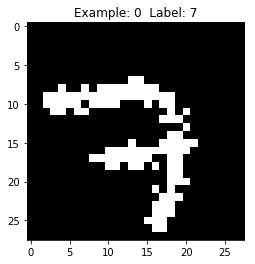

Original image


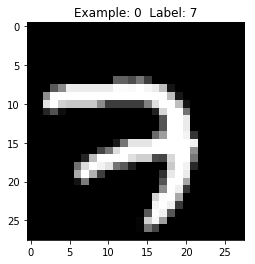

Image generated by RBM 1


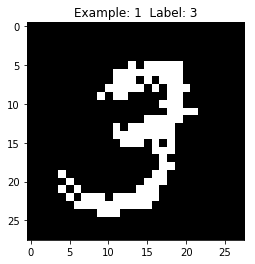

Original image


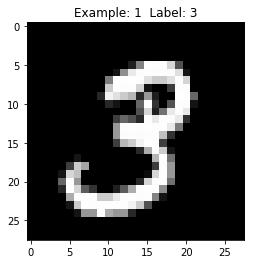

Image generated by RBM 1


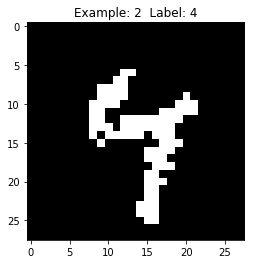

Original image


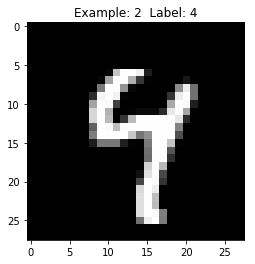

Image generated by RBM 1


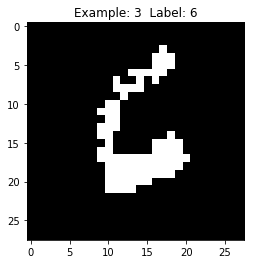

Original image


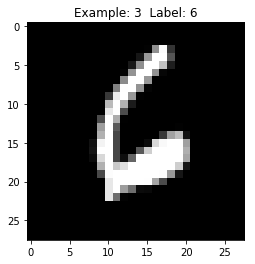

Image generated by RBM 1


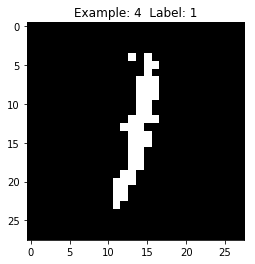

Original image


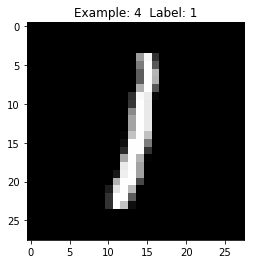

Image generated by RBM 1


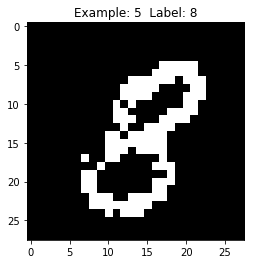

Original image


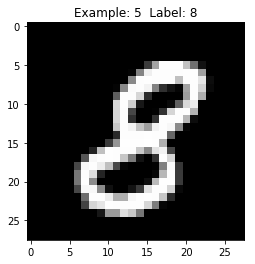

Image generated by RBM 1


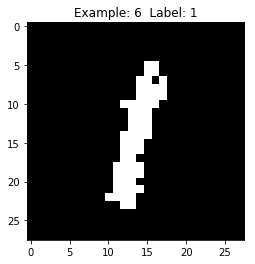

Original image


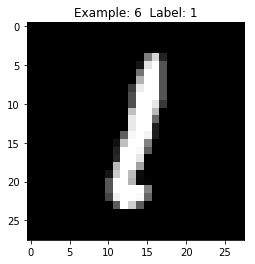

Image generated by RBM 1


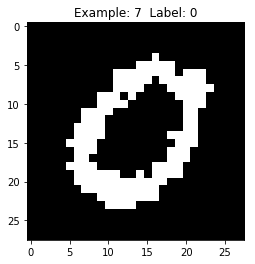

Original image


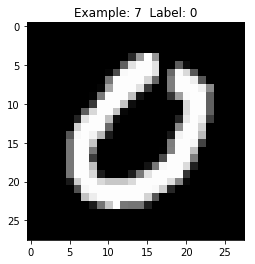

Image generated by RBM 1


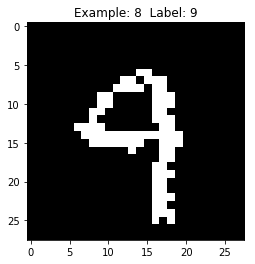

Original image


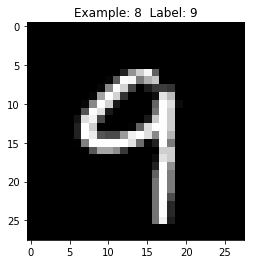

Image generated by RBM 1


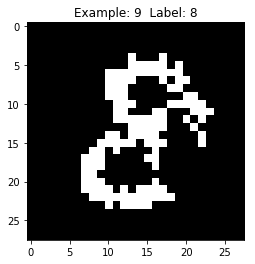

Original image


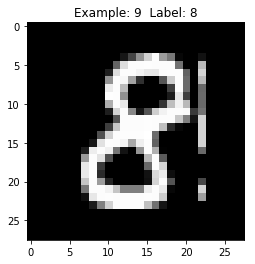

In [17]:
inputX = np.array(train_X)
rbmOne = rbm_list[0]

print('RBM 1')
outputX_rbmOne, reconstructedX_rbmOne, hiddenX_rbmOne = rbmOne.rbm_output(inputX)
reconstructedX_rbmOne = pd.DataFrame(data=reconstructedX_rbmOne, index=train_X.index)
for j in range(0,10):
    example = j
    print("Image generated by RBM 1")
    view_digit(reconstructedX_rbmOne, train_Y, example)
    print("Original image")
    view_digit(train_X, train_Y, example)

# The Full DBN
Now, let’s define the DBN class, which will take in the three RBMs we just trained and add a fourth RBM that performs forward and backward passes to refine the overall DBN-based generative model.

First, let’s define the hyperparameters of the class. These include the original input size, the input size of the third RBM we just trained, the final output size we would like to have from the DBN, the learning rate, the number of epochs we wish to train for, the batch size for training, and the three RBMs we just trained. Like before, we will need to generate zero matrices for the weights, hidden bias, and visible bias.

In [18]:
class DBN(object):
    def __init__(self, original_input_size, input_size, output_size, 
                 learning_rate, epochs, batchsize, rbmOne, rbmTwo, rbmThree):
        # Define hyperparameters
        self._original_input_size = original_input_size
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        self.rbmOne = rbmOne
        self.rbmTwo = rbmTwo
        self.rbmThree = rbmThree
    
        self.w = np.zeros([input_size, output_size], "float")
        self.hb = np.zeros([output_size], "float")
        self.vb = np.zeros([input_size], "float")
    
    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random_uniform(tf.shape(probs))))

    '''Each of the three RBMs we have trained already has its own weights matrix, 
    hidden bias vector, and visible bias vector. During the training of the fourth RBM as 
    part of the DBN, we will not adjust the weights matrix, hidden bias vector, and 
    visible bias vector of those first three RBMs. Rather, we will use the first three 
    RBMs as fixed components of the DBN. We will call upon the first three RBMs just to 
    do the forward and backward passes (and use samples of the data these three generate).

    During the training of the fourth RBM in the DBN, we will only adjust weights and 
    biases of the fourth RBM. In other words, the fourth RBM in the DBN takes the output 
    of the first three RBMs as given and performs forward and backward passes to learn 
    a generative model that minimizes the reconstruction error between its generated 
    images and the original images'''
    def train(self, X):
        _w = tf.placeholder("float", [self._input_size, self._output_size])
        _hb = tf.placeholder("float", [self._output_size])
        _vb = tf.placeholder("float", [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], "float")
        prv_hb = np.zeros([self._output_size], "float")
        prv_vb = np.zeros([self._input_size], "float")
        
        cur_w = np.zeros([self._input_size, self._output_size], "float")
        cur_hb = np.zeros([self._output_size], "float")
        cur_vb = np.zeros([self._input_size], "float")
        
        v0 = tf.placeholder("float", [None, self._original_input_size])

        forwardOne = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(v0, self.rbmOne.w) + self.rbmOne.hb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(v0, self.rbmOne.w) + self.rbmOne.hb)))))
        forwardTwo = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb)))))
        forward = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(forwardTwo, self.rbmThree.w) + self.rbmThree.hb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul( forwardTwo, self.rbmThree.w) + self.rbmThree.hb)))))
        h0 = self.sample_prob(self.prob_h_given_v(forward, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        
        positive_grad = tf.matmul(tf.transpose(forward), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        update_w = _w + self.learning_rate * (positive_grad - negative_grad) / tf.to_float(tf.shape(forward)[0])
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(forward - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        
        backwardOne = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(v1, self.rbmThree.w.T) + self.rbmThree.vb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(v1, self.rbmThree.w.T) + self.rbmThree.vb)))))
        backwardTwo = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmTwo.w.T) + self.rbmTwo.vb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmTwo.w.T) + self.rbmTwo.vb)))))
        backward = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmOne.w.T) + self.rbmOne.vb) - tf.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmOne.w.T) + self.rbmOne.vb)))))
        
        err = tf.reduce_mean(tf.square(v0 - backward))
        error_list = []
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(self.epochs):
                for start, end in zip(range(0, len(X), self.batchsize), range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch, _w:  prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print ('Epoch: %d' % (epoch+1),'reconstruction error: %f' % error)
                error_list.append(error)
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb
            return error_list
        
    def dbn_output(self, X):

        input_X = tf.constant(X)
        forwardOne = tf.nn.sigmoid(tf.matmul(input_X, self.rbmOne.w) + self.rbmOne.hb)
        forwardTwo = tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb)
        forward = tf.nn.sigmoid(tf.matmul(forwardTwo, self.rbmThree.w) + self.rbmThree.hb)

        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)

        out = tf.nn.sigmoid(tf.matmul(forward, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(forward, _w, _hb))
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))

        backwardTwo = tf.nn.sigmoid(tf.matmul(visibleGen, self.rbmThree.w.T) + self.rbmThree.vb)
        backwardOne = tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmTwo.w.T) + self.rbmTwo.vb)
        backward = tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmOne.w.T) + self.rbmOne.vb)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            return sess.run(out), sess.run(backward)

    def show_features(self, shape, suptitle, count=-1):
        maxw = np.amax(self.w.T)
        minw = np.amin(self.w.T)
        count = self._output_size if count == -1 or count > self._output_size else count
        ncols = count if count < 14 else 14 
        nrows = count//ncols
        nrows = nrows if nrows > 2 else 3
        fig = plt.figure(figsize=(ncols, nrows), dpi=100)
        grid = Grid(fig, rect=111, nrows_ncols=(nrows, ncols), axes_pad=0.01)

        for i, ax in enumerate(grid):
            x = self.w.T[i] if i<self._input_size else np.zeros(shape)
            x = (x.reshape(1, -1) - minw)/maxw
            ax.imshow(x.reshape(*shape), cmap=mpl.cm.Greys)
            ax.set_axis_off()

        fig.text(0.5,1, suptitle, fontsize=20, horizontalalignment='center')
        fig.tight_layout()
        plt.show()
        return

Instantiate DBN Class.

In [19]:
dbn = DBN(784, 500, 500, 1.0, 50, 200, rbm_list[0], rbm_list[1], rbm_list[2])

Now, let’s train.

In [20]:
inputX = np.array(train_X)
error_list = []
error_list = dbn.train(inputX)

Epoch: 0 reconstruction error: 0.088813
Epoch: 1 reconstruction error: 0.081693
Epoch: 2 reconstruction error: 0.078035
Epoch: 3 reconstruction error: 0.075192
Epoch: 4 reconstruction error: 0.073421
Epoch: 5 reconstruction error: 0.072003
Epoch: 6 reconstruction error: 0.071188
Epoch: 7 reconstruction error: 0.070486
Epoch: 8 reconstruction error: 0.069768
Epoch: 9 reconstruction error: 0.069153
Epoch: 10 reconstruction error: 0.068397
Epoch: 11 reconstruction error: 0.067951
Epoch: 12 reconstruction error: 0.067525
Epoch: 13 reconstruction error: 0.067071
Epoch: 14 reconstruction error: 0.066616
Epoch: 15 reconstruction error: 0.066060
Epoch: 16 reconstruction error: 0.065969
Epoch: 17 reconstruction error: 0.065679
Epoch: 18 reconstruction error: 0.065305
Epoch: 19 reconstruction error: 0.065046
Epoch: 20 reconstruction error: 0.064791
Epoch: 21 reconstruction error: 0.064380
Epoch: 22 reconstruction error: 0.064289
Epoch: 23 reconstruction error: 0.063967
Epoch: 24 reconstruction e

Plot reconstruction errors.

DBN


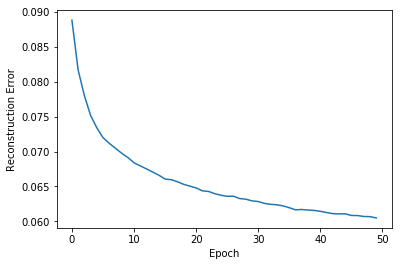

In [21]:
print("DBN")
pd.Series(error_list).plot(logy=False)
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")
plt.show()

Generate images and store them.

In [22]:
#store the first five thousand images in a dataframe called inputXReduced
inputXReduced = train_X.loc[:4999]
'''from these five thousand labeled images, we will generate new images from the generative model 
we just built using a DBN. And, we will do this 20 times over. In other words, we will generate 
five thousand new images 20 times to create a dataset that is 100,000 large, all of which will be labeled'''
for i in range(0,20):
    finalOutput_DBN, reconstructedOutput_DBN = dbn.dbn_output(inputXReduced)
    if i==0:
        generatedImages = finalOutput_DBN
    else:
        generatedImages = np.append(generatedImages, finalOutput_DBN, axis=0)

Run  0
Run  1
Run  2
Run  3
Run  4
Run  5
Run  6
Run  7
Run  8
Run  9
Run  10
Run  11
Run  12
Run  13
Run  14
Run  15
Run  16
Run  17
Run  18
Run  19


Generate a vector of labels for the generated images.

In [24]:
'''loop through the first five thousand labels from the training labels, called train_Y, 
20 times to generate an array of labels called labels'''
for i in range(0,20):
    if i==0:
        labels = train_Y.loc[:4999]
    else:
        labels = np.append(labels,train_Y.loc[:4999])

Generate images based on the validation set.

In [25]:
'''generate the output on the validation set, which we will need to evaluate the image classifier'''
inputValidation = np.array(validation_X)
finalOutput_DBN_validation, reconstructedOutput_DBN_validation = dbn.dbn_output(inputValidation)

View first few reconstructed images.

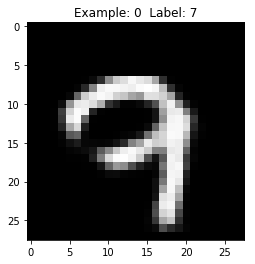

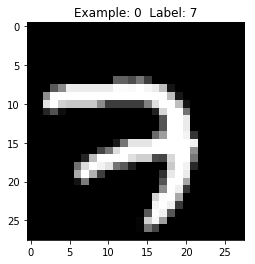

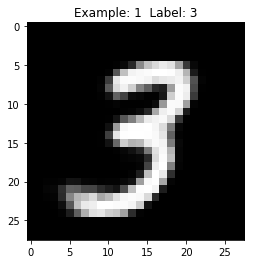

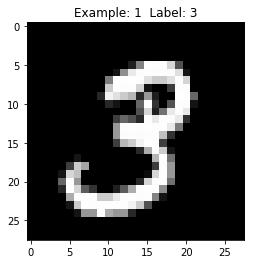

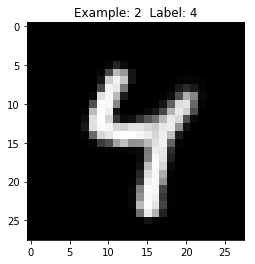

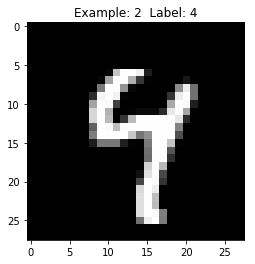

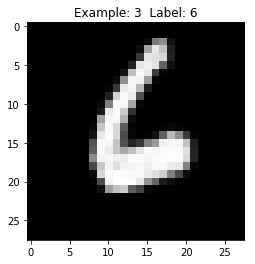

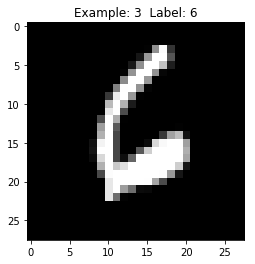

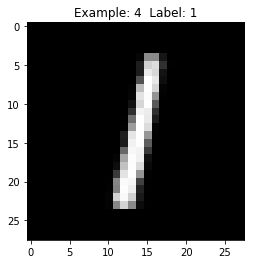

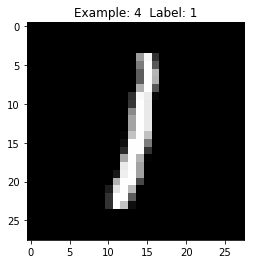

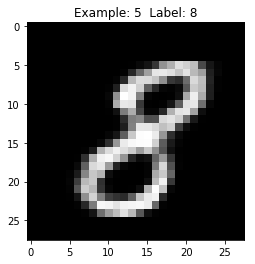

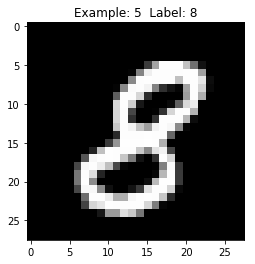

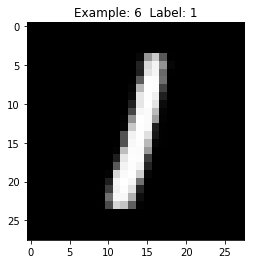

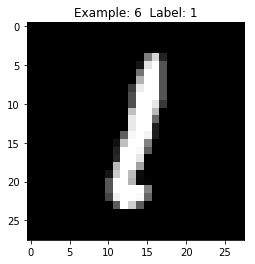

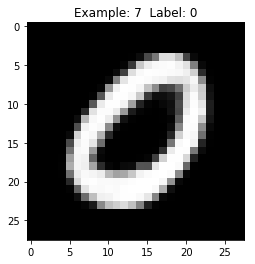

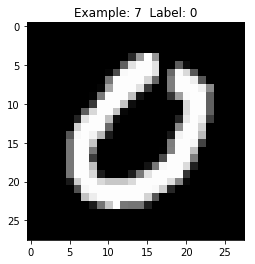

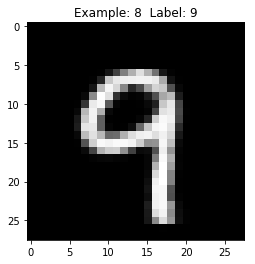

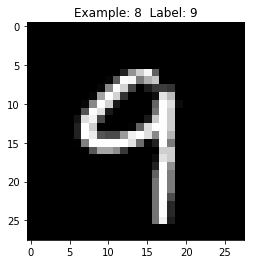

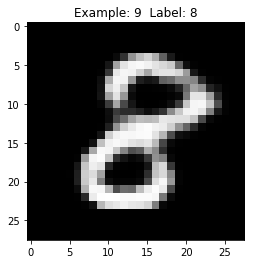

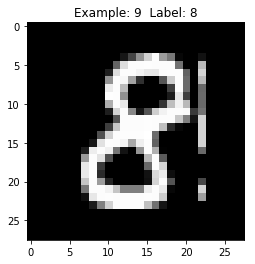

In [26]:
for i in range(0,10):
    example = i
    reconstructedX = pd.DataFrame(data=reconstructedOutput_DBN, index=train_X[0:5000].index)
    view_digit(reconstructedX, train_Y, example)
    view_digit(train_X, train_Y, example)

Also note that the DBN model (as well as the RBM models) is generative and therefore the images are produced using a stochastic process. The images are not produced using a deterministic process, and, therefore, the images of a single example vary from one DBN run to another.

To simulate this, we will take the first MNIST image and use the DBN to generate a new one and do this 10 times over

Run  0
Generated


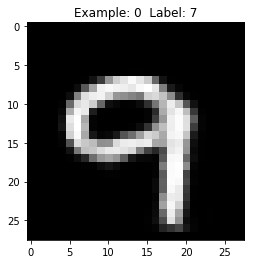

Run  1
Generated


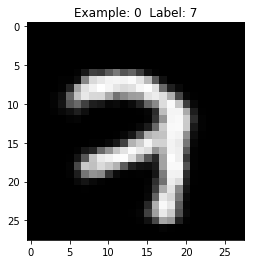

Run  2
Generated


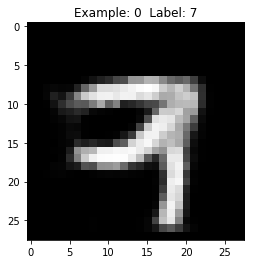

Run  3
Generated


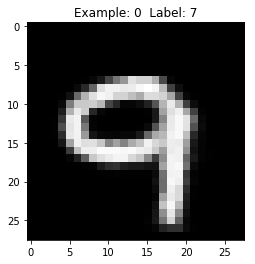

Run  4
Generated


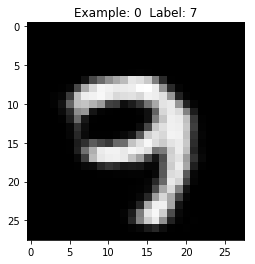

Run  5
Generated


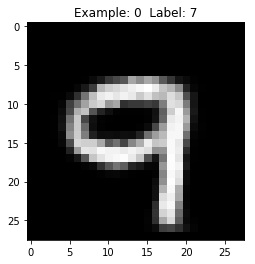

Run  6
Generated


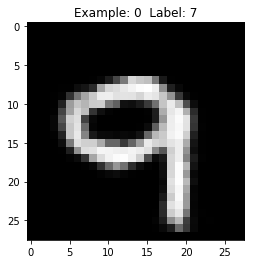

Run  7
Generated


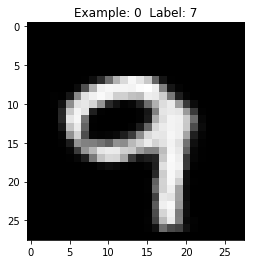

Run  8
Generated


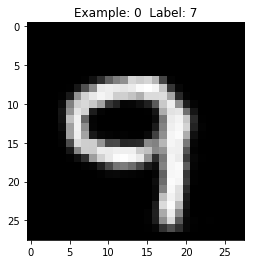

Run  9
Generated


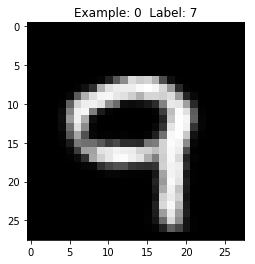

In [27]:
inputXReduced = train_X.loc[:0]
for i in range(0,10):
    example = 0
    print("Run ",i)
    finalOutput_DBN_sevens, reconstructedOutput_DBN_fives = dbn.dbn_output(inputXReduced)
    reconstructedX_sevens = pd.DataFrame(data=finalOutput_DBN_sevens, index=[0])
    print("Generated")
    view_digit(reconstructedX_sevens, train_Y.loc[:0], example)

Prepare DBN-based DataFrames.

In [34]:
predictionColumns = ['0','1','2','3','4','5','6','7','8','9']
predictionsDBN = pd.DataFrame(data=[],index=validation_Y.index, columns=predictionColumns)

The following code shows the overall accuracy of this unsupervised-enchanced image classification solution.

In [33]:
# DBN
predictionsDBN_firm = np.argmax(np.array(predictionsDBN), axis=1)
accuracyValidation_DBN = accuracy_score(np.array(validation_Y), predictionsDBN_firm)
print("DBN-Based Solution Accuracy: ", accuracyValidation_DBN)

DBN-Based Solution Accuracy:  0.0958
